In [1]:
import numpy as np
import gurobipy as grb

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

# local imports
from models.svm import SoftSVMDual

In [12]:
# import training and validation data
train_path = 'data/sentiment_train.csv'
val_path = 'data/sentiment_val.csv'
train_data = pd.read_csv(train_path)
val_data = pd.read_csv(val_path)

In [56]:
# build BoW vectorizor
vectorizor = TfidfVectorizer(stop_words='english')

# fit transform training and validation data
train_tfidf = vectorizor.fit_transform(train_data['tweet']).toarray()
val_tfidf = vectorizor.transform(val_data['tweet']).toarray()

# get labels and convert from [0,1] to [-1,1]
train_labels = 2 * train_data['label'].to_numpy() - 1
val_labels = 2 * val_data['label'].to_numpy() - 1

# get word vocabulary
words = vectorizor.get_feature_names_out()

In [59]:
# hyperparameters
C = 1.0
gamma = 0.5

# construct soft margin SVM with RBF kernel
model = SoftSVMDual(train_tfidf, train_labels, C, kernel="rbf", gamma=gamma)

In [60]:
# optimize the model
model.optimize()

In [66]:
pred_labels = model.predict(val_tfidf)

# compute AUROC score
auroc = metrics.roc_auc_score(val_labels, pred_labels)
print(f"Validation AUROC: {auroc:.4f}")

Validation AUROC: 0.8787


In [62]:
# randomly sample 10 2d points and labels
num_points = 10
dim = 2
points = np.random.randn(num_points, dim)
labels = np.random.choice([-1, 1], size=10)

# construct soft margin SVM with RBF kernel
svm_model = SoftSVMDual(points, labels, C=0.01, kernel="linear", gamma=0.5)
svm_model.optimize()

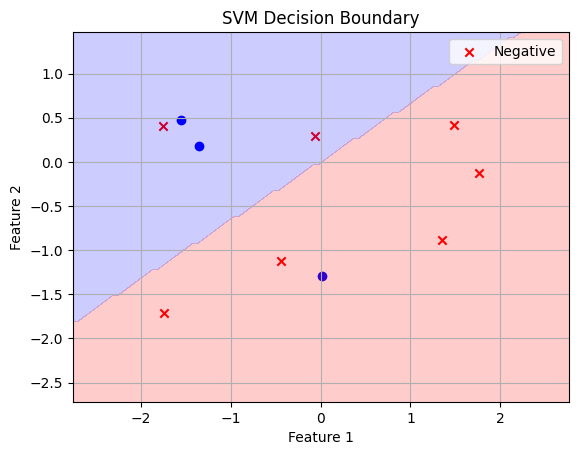

In [63]:
# Plotting the results
import matplotlib.pyplot as plt

# plot data points
for i in range(num_points):
    if labels[i] == 1:
        plt.scatter(points[i, 0], points[i, 1], color='blue', marker='o', label='Positive' if i == 0 else "")
    else:
        plt.scatter(points[i, 0], points[i, 1], color='red', marker='x', label='Negative' if i == 0 else "")

# create a grid to plot decision boundary
x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = svm_model.predict(grid_points)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['red', 'blue'])
        
# plot quadratic decision boundary

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend()
plt.grid()
plt.show()

In [64]:
test_point = np.array([[0, 0]])
predicted_label = svm_model.predict(test_point)
print(f"Predicted label for point {test_point[0]}: {predicted_label[0]}")

Predicted label for point [0 0]: 0.0
